In [1]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from tensorflow.keras.preprocessing.image import img_to_array


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
drive_path = '/content/drive/My Drive/'

Mounted at /content/drive


In [3]:
#folder of images in drive
folder_path = os.path.join(drive_path, 'dl_portion_data')
os.listdir(folder_path)

['seed0306.png',
 'seed0304.png',
 'seed0307.png',
 'seed0310.png',
 'seed0308.png',
 'seed0309.png',
 'seed0302.png',
 'seed0303.png',
 'seed0305.png',
 'seed0301.png',
 'seed0314.png',
 'seed0316.png',
 'seed0322.png',
 'seed0317.png',
 'seed0323.png',
 'seed0313.png',
 'seed0321.png',
 'seed0319.png',
 'seed0312.png',
 'seed0318.png',
 'seed0315.png',
 'seed0320.png',
 'seed0325.png',
 'seed0324.png',
 'seed0328.png',
 'seed0326.png',
 'seed0330.png',
 'seed0332.png',
 'seed0329.png',
 'seed0327.png',
 'seed0333.png',
 'seed0331.png',
 'seed0343.png',
 'seed0340.png',
 'seed0338.png',
 'seed0335.png',
 'seed0339.png',
 'seed0337.png',
 'seed0341.png',
 'seed0334.png',
 'seed0336.png',
 'seed0342.png',
 'seed0347.png',
 'seed0351.png',
 'seed0346.png',
 'seed0352.png',
 'seed0344.png',
 'seed0345.png',
 'seed0353.png',
 'seed0349.png',
 'seed0348.png',
 'seed0350.png',
 'seed0354.png',
 'seed0363.png',
 'seed0358.png',
 'seed0356.png',
 'seed0362.png',
 'seed0360.png',
 'seed0357.png

In [4]:
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

# defining the size of the image
SIZE = 128
_img = []
# for person_dir in os.listdir(folder_path):
#     person_path = os.path.join(folder_path, person_dir)

#     if not os.path.isdir(person_path):
        # continue


for filename in os.listdir(folder_path):

    image_path = os.path.join(folder_path, filename)

    image = cv2.imread(image_path)
    if image is None :
      continue
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #resizing image
    img = cv2.resize(img, (SIZE, SIZE))
    img = (img - 127.5) / 127.5
    imh = img.astype(float)
    _img.append(img_to_array(img))


In [5]:
#folder of images in drive
folder_path_2 = os.path.join(drive_path, 'dl_portion_data_2')

In [6]:
for filename in os.listdir(folder_path_2):

    image_path = os.path.join(folder_path_2, filename)

    image = cv2.imread(image_path)
    if image is None :
      continue
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #resizing image
    img = cv2.resize(img, (SIZE, SIZE))
    img = (img - 127.5) / 127.5
    imh = img.astype(float)
    _img.append(img_to_array(img))


In [7]:
#folder of images in drive
folder_path_3 = os.path.join(drive_path, 'dl_portion_data_2')

In [8]:
for filename in os.listdir(folder_path_3):

    image_path = os.path.join(folder_path_3, filename)

    image = cv2.imread(image_path)
    if image is None :
      continue
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #resizing image
    img = cv2.resize(img, (SIZE, SIZE))
    img = (img - 127.5) / 127.5
    imh = img.astype(float)
    _img.append(img_to_array(img))

In [9]:
def plot_images(sqr = 5):
    plt.figure(figsize = (10,10))
    plt.title("Real Images",fontsize = 35)
    for i in range(sqr * sqr):
        plt.subplot(sqr,sqr,i+1)
        plt.imshow(_img[i]*0.5 + 0.5 )
        plt.xticks([])
        plt.yticks([])

<ipython-input-9-606d31ef4a38>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(sqr,sqr,i+1)


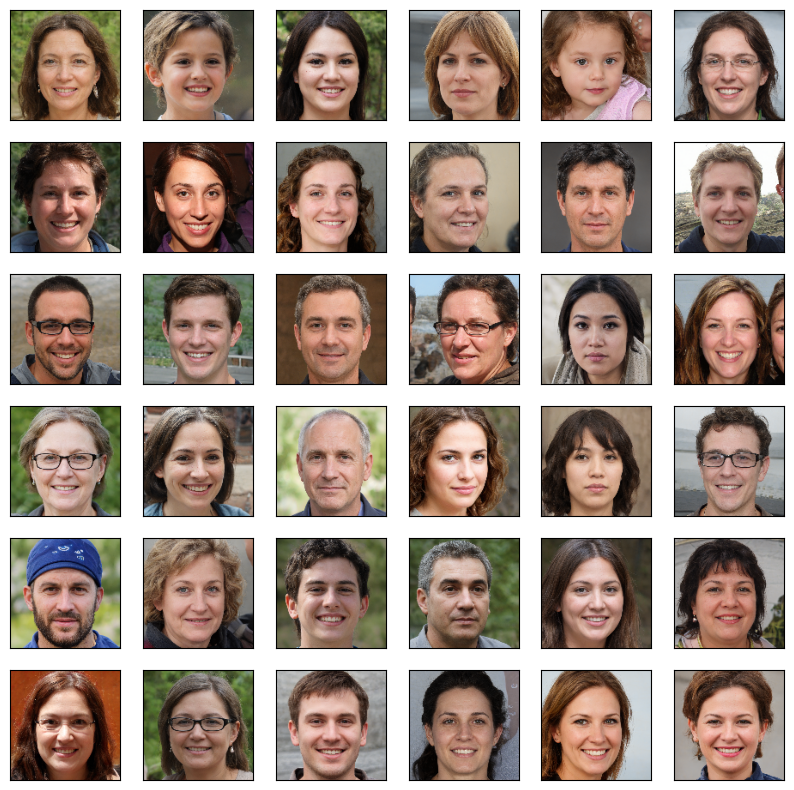

In [10]:
# to plot images
plot_images(6)

In [11]:
batch_size = 32
dataset=tf.data.Dataset.from_tensor_slices(np.array(_img)).batch(batch_size)

In [12]:
latent_dim = 100
def Generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128*128*3, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.Reshape((128,128,3)))
    # downsampling
    model.add(tf.keras.layers.Conv2D(128,4, strides=1, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=1, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))

    model.add(tf.keras.layers.LeakyReLU())
    #upsampling
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(256, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(256, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2DTranspose(128, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(128, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(3,4,strides = 1, padding = 'same',activation = 'tanh'))



    return model

In [13]:
latent_dim = 100

# Instantiate the generator model
generator = Generator()

# Print the summary of the generator model
generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 49152)             4915200   
                                                                 
 reshape (Reshape)           (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     6144      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       262144    
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 128)       0         
                                                        

In [14]:
def Discriminator():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((SIZE, SIZE, 3)))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))
    return model

In [15]:
discriminator = Discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       6144      
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       262144    
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 128)      

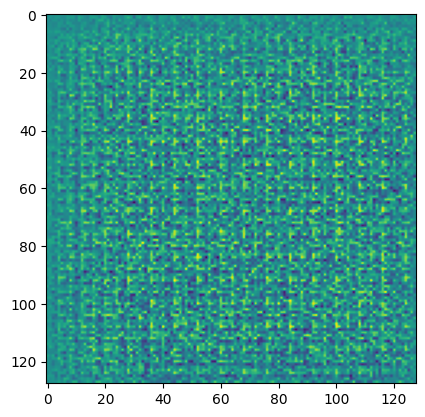

In [16]:
# the generator before training
noise = np.random.normal(-1,1,(1,100))
img = generator(noise)
plt.imshow(img[0,:,:,0])
plt.show()

In [17]:
optimizer = tf.keras.optimizers.legacy.RMSprop(
    lr=0.0001,
    clipvalue=1.0,
    decay=1e-8
)

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
def discriminator_loss(fake_output, real_output):
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    return fake_loss + real_loss

In [19]:
def train_steps(images):
    noise = np.random.normal(0,1,(batch_size,latent_dim))
    with tf.GradientTape() as gen_tape , tf.GradientTape() as disc_tape:
        generated_images = generator(noise)
        fake_output = discriminator(generated_images)
        real_output = discriminator(images)

        gen_loss = generator_loss(fake_output)
        dis_loss = discriminator_loss(fake_output, real_output)


    gradient_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradient_of_discriminator = disc_tape.gradient(dis_loss, discriminator.trainable_variables)

    optimizer.apply_gradients(zip(gradient_of_generator,generator.trainable_variables))
    optimizer.apply_gradients(zip(gradient_of_discriminator, discriminator.trainable_variables))

    loss = {'gen loss':gen_loss,
           'disc loss': dis_loss}
    return loss

In [20]:
def plot_generated_images(square = 5, epochs = 0):


  plt.figure(figsize = (10,10))
  for i in range(square * square):
    if epochs != 0:
        if(i == square //2):
            plt.title("Generated Image at Epoch:{}\n".format(epochs), fontsize = 32, color = 'black')
    plt.subplot(square, square, i+1)

    noise = np.random.normal(0,1,(1,latent_dim))
    img = generator(noise)

    plt.imshow(np.clip((img[0,...]+1)/2, 0, 1))

    plt.xticks([])
    plt.yticks([])
    plt.grid()

In [21]:
import time
def train(epochs,dataset):
    generator_losses = []
    discriminator_losses = []
    for epoch in range(epochs):
        start = time.time()
        print("\nEpoch : {}".format(epoch + 1))
        for images in dataset:
            loss = train_steps(images)
            generator_losses.append(loss['gen loss'])
            discriminator_losses.append(loss['disc loss'])
        print(" Time:{}".format(np.round(time.time() - start),2))
        print("Generator Loss: {} Discriminator Loss: {}".format(loss['gen loss'],loss['disc loss']))
    return loss['gen loss'],loss['disc loss']



In [ ]:
train(5,dataset)


Epoch : 1


In [ ]:
plot_generated_images(3)

In [ ]:
generator.save('generator_2.h5')
discriminator.save("discriminator_2.h5")

In [ ]:
from keras.models import load_model

generator = load_model('generator.h5')